# Version 3 - Prompter Module

## Ver 3.1 - Add initial prompter module (generate questions based on goal and code)
- Added `prompter.py` 
- Added a prompter dataclass (just for formatting)
- Added prompter to the `Manager` class

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, structured questions to prompt the user to gain insights from data visualizations. 
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

``[
    { "index": 0,  "question": "What is the distribution of X"} ..
    ]
``
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}. The code of the visualization is: {code}.
"""
```

## Ver 3.2 - Remove code from prompt and generate questions with rationale
- Removed code from prompts to see if having goal context is enough (answer: ?)
- Generated rationale

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, structured questions to prompt the user to gain insights from a data visualization given their goal. 
The QUESTIONS YOU ASK MUST INCITE INSIGHTFUL IDEAS AND BE MEANINGFUL (e.g., related to the goal). Each prompting question must include a question and a rationale (JUSTIFICATION FOR WHAT we will learn from the answering the question).
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "question": "What is the distribution of X", "rationale": "This tells about "} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}.
"""
```

## Ver 3.3 - Add initial insight module
- Added an insight module to generate insights given the user's goal, questions about the visualization, and answers to the questions
- Observations: generated insights are not as insightful as I would like LOL

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, and creative insights and connections based on the answers the user gave to specific questions about a visualization given their goal. 
The INSIGHTS YOU GENERATE MUST BE INSIGHTFUL AND BE MEANINGFUL (e.g., related to the goal). 
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}.
\nHere are the questions about the visualization and the corresponding answers:
"""
```

## Ver 3.4 - Modify prompt to make insights better

- prompt modification

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, and creative insights and connections based on the answers the user gave to specific questions about a visualization given their goal. 
You should give possible and deeper explanations for the insights you generated. 
"""
```

## Ver 3.5 - Experimenting with the prompt to generate as much insigtful insights

``` python
SYSTEM_PROMPT = """

"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt += f"""
\nThese are the egoals of the user and the visualization they used:
\nQuestion: {goal.question}
\nVisualization: {goal.visualization}
\nRationale: {goal.rationale}
\nCan you generate insights from the user's answers that draws connections between them?
"""
```

## Ver 3.6 - Making a stronger prompt to generate stronger insights

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and create hypothesis for why the data appears to be that certain way.
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt += f"""
\nThis is the goal of the user:
\nQuestion: {goal.question}
\nVisualization: {goal.visualization}
\nRationale: {goal.rationale}
\nCan you generate insights from the user's answers that draws connections between them?
"""
```

## Ver 3.7 - Update prompt to include suggestions that the user can explore (DISCONTINUED)

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and CREATE A HYPOTHESIS for why the data appears to be that certain way and GIVE SUGGESTIONS on what the user can examine next.
"""
```

## Ver 3.8 - Update prompt to generate suggestions separately from the insight (DISCONTINUED)
- decided to not add next steps anymore since it derails the insight generation process and makes it more confused, plus it ends up making the goal explorer for the insight a bit redundant

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and CREATE A HYPOTHESIS for why the data appears to be that certain way. 
\nAside fron an insight, I want you to generate next steps that can GIVE SUGGESTIONS on what the user can examine related to the insight.
"""
```

## Setup

In [1]:
%pip uninstall -y lida 
%pip install -U python-dotenv
%pip install -U llmx
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install seaborn
# !pip install lida[infographics] # for infographics support

Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip show lida

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import os
import pprint
import pickle

In [5]:
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
sys.path.append(os.path.abspath('../..'))

In [7]:
from lida.components.manager import Manager
from llmx import TextGenerationConfig, llm

In [8]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv("APIKEY")))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)

## Summarize Data, Generate Goals

### Summarize

In [9]:
summary = lida.summarize("../cars.csv", summary_method="default", textgen_config=textgen_config)  
pprint.pprint(summary)

here
object
{'Sedan': 234, 'SUV': 59, 'Sports Car': 45, 'Wagon': 29, 'Minivan': 20}
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
{'dataset_description': '',
 'field_names': ['Name',
                 'Type',
                 'AWD',
                 'RWD',
                 'Retail_Price',
                 'Dealer_Cost',
                 'Engine_Size__l_',
                 'Cyl',
                 'Horsepower_HP_',
                 'City_Miles_Per_Gallon',
                 'Highway_Mi

### Generate Goals without a Persona

In [21]:
goals = lida.goals(summary, n=20, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What are the average Retail Prices for different car Types?

**Visualization:** `bar chart of average Retail_Price grouped by Type`

**Rationale:** This visualization will help us understand the pricing strategy across different car categories (Type), revealing which types are generally more expensive. The fields used are 'Retail_Price' for pricing and 'Type' for categorization, making it easy to compare average prices across the five unique car types.



### Goal 1
---
**Question:** How does the distribution of Engine Sizes vary across different Types of cars?

**Visualization:** `box plot of Engine_Size__l_ grouped by Type`

**Rationale:** A box plot will show the spread and central tendency of engine sizes for each car type (Type). This will highlight any significant differences in engine size, helping to identify trends or preferences within each category. The fields used are 'Engine_Size__l_' for engine size and 'Type' for car categorization.



### Goal 2
---
**Question:** What is the relationship between Horsepower and Type of car?

**Visualization:** `scatter plot of Horsepower_HP_ colored by Type`

**Rationale:** This scatter plot will help visualize how horsepower varies among different car types (Type), allowing us to identify any patterns or outliers in performance. The fields 'Horsepower_HP_' will provide the horsepower data, while 'Type' will categorize the cars.



### Goal 3
---
**Question:** What is the count of cars per Type, and how does it relate to their average Retail Price?

**Visualization:** `dual-axis bar chart of count of cars by Type and average Retail_Price by Type`

**Rationale:** This visualization will provide insights into the market share of each car type (Type) and its average pricing (Retail_Price). The dual-axis allows us to see both the number of cars and their average pricing, revealing potential trends in car popularity versus pricing. The fields used are 'Type' for categorization and 'Retail_Price' for pricing.



### Goal 4
---
**Question:** What are the most common Types of cars and how do they compare in terms of City and Highway Miles Per Gallon?

**Visualization:** `grouped bar chart of average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon by Type`

**Rationale:** This grouped bar chart will allow us to compare fuel efficiency (City_Miles_Per_Gallon and Highway_Miles_Per_Gallon) across different car types (Type). This is important for understanding consumer preferences regarding fuel efficiency. The fields used are 'Type' for categorization and both 'City_Miles_Per_Gallon' and 'Highway_Miles_Per_Gallon' for efficiency metrics.



### Goal 5
---
**Question:** What is the correlation between Retail Price and Dealer Cost?

**Visualization:** `scatter plot of Retail_Price vs Dealer_Cost`

**Rationale:** This visualization helps to understand the relationship between the retail price and the dealer cost of cars. By plotting these two numerical fields against each other, we can identify if higher dealer costs are associated with higher retail prices, which is crucial for pricing strategies.



### Goal 6
---
**Question:** How does the distribution of Horsepower vary by car Type?

**Visualization:** `box plot of Horsepower_HP_ grouped by Type`

**Rationale:** A box plot allows us to visualize the distribution of horsepower across different car types, highlighting the median, quartiles, and potential outliers. This is important for understanding performance expectations within each car category.



### Goal 7
---
**Question:** What is the relationship between Engine Size and Fuel Efficiency (City and Highway MPG)?

**Visualization:** `scatter plot of Engine_Size__l_ vs City_Miles_Per_Gallon and Highway_Miles_Per_Gallon`

**Rationale:** By plotting engine size against both city and highway miles per gallon, we can analyze how engine size influences fuel efficiency. This dual scatter plot will help identify trends and correlations that can inform decisions on engine design and fuel economy.



### Goal 8
---
**Question:** What is the impact of Weight on Horsepower?

**Visualization:** `scatter plot of Weight vs Horsepower_HP_`

**Rationale:** This scatter plot will illustrate the relationship between the weight of a car and its horsepower. Understanding this correlation can be vital for performance analysis and vehicle design, as heavier cars may require more horsepower to achieve similar performance.



### Goal 9
---
**Question:** How does the number of Cylinders relate to Retail Price?

**Visualization:** `bar chart of average Retail_Price by Cyl`

**Rationale:** A bar chart showing the average retail price for cars based on the number of cylinders will help us understand how engine configuration affects pricing. This is particularly useful for market segmentation and targeting based on performance characteristics.



### Goal 10
---
**Question:** How does the relationship between Engine Size, Weight, and Retail Price vary across different Types of cars?

**Visualization:** `scatter plot of Engine_Size__l_ vs Weight colored by Type with Retail_Price as the size of the points`

**Rationale:** This visualization will help us understand how Engine Size and Weight interact with the Retail Price of cars, segmented by their Type. It allows for an analysis of trends and patterns, showcasing how larger or heavier vehicles might correlate with higher Retail Prices, while also observing differences across Types.



### Goal 11
---
**Question:** What is the relationship between Horsepower, Cylinders, and City Miles Per Gallon?

**Visualization:** `3D scatter plot of Horsepower_HP_ vs Cyl colored by City_Miles_Per_Gallon`

**Rationale:** This visualization provides insight into how the number of Cylinders and Horsepower impact fuel efficiency in terms of City Miles Per Gallon. By visualizing these three variables together, we can identify potential trade-offs between power and fuel efficiency.



### Goal 12
---
**Question:** How do Weight, Wheel Base, and Highway Miles Per Gallon relate to each other across different Types of cars?

**Visualization:** `bubble chart of Weight vs Wheel_Base with Highway_Miles_Per_Gallon as the size of the bubbles, colored by Type`

**Rationale:** This visualization will illustrate how Weight and Wheel Base influence fuel efficiency on the highway, while allowing us to observe variations across car Types. The use of a bubble chart will enable us to see the relative impact of these dimensions on fuel economy.



### Goal 13
---
**Question:** What is the correlation between Retail Price, Dealer Cost, and Engine Size?

**Visualization:** `heatmap showing the correlation coefficients between Retail_Price, Dealer_Cost, and Engine_Size__l_`

**Rationale:** This heatmap will provide a clear visual representation of the correlations between these three variables. Understanding how closely Retail Price and Dealer Cost relate to Engine Size will help in assessing pricing strategies and market positioning.



### Goal 14
---
**Question:** How does the relationship between Type, City Miles Per Gallon, and Highway Miles Per Gallon vary?

**Visualization:** `grouped bar chart comparing average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon for each Type`

**Rationale:** This grouped bar chart allows for easy comparison of fuel efficiency metrics between different Types of cars. It highlights how car Type influences city versus highway fuel efficiency, which is critical for consumers making purchasing decisions.



### Goal 15
---
**Question:** What is the relationship between Engine Size and Retail Price?

**Visualization:** `scatter plot of Engine_Size__l_ vs Retail_Price`

**Rationale:** This visualization allows us to observe if there is a correlation between the size of the engine and the retail price of the cars. A scatter plot is appropriate here as it can reveal patterns, trends, and potential outliers in the relationship between these two continuous variables.



### Goal 16
---
**Question:** How does Weight influence Highway Miles Per Gallon?

**Visualization:** `scatter plot of Weight vs Highway_Miles_Per_Gallon`

**Rationale:** This scatter plot will help us understand the impact of a car's weight on its fuel efficiency on highways. Analyzing this relationship can provide insights into how heavier vehicles perform in terms of mileage, and it's best represented by a scatter plot to visualize any trends or correlations.



### Goal 17
---
**Question:** What is the correlation between Horsepower and City Miles Per Gallon?

**Visualization:** `scatter plot of Horsepower_HP_ vs City_Miles_Per_Gallon`

**Rationale:** Using a scatter plot to examine the relationship between horsepower and city mileage will help us identify if more powerful cars tend to consume more fuel in city driving conditions. This visualization is effective for understanding the potential trade-off between performance and fuel efficiency.



### Goal 18
---
**Question:** How do the number of Cylinders relate to Retail Price?

**Visualization:** `box plot of Cyl vs Retail_Price`

**Rationale:** A box plot will illustrate the distribution of retail prices across different cylinder counts, allowing us to see the median, quartiles, and potential outliers. This visualization is useful for understanding how the engine configuration may affect pricing strategies in the market.



### Goal 19
---
**Question:** What is the relationship between Type of car and Weight?

**Visualization:** `bar chart of Type vs Weight (average)`

**Rationale:** This bar chart will display the average weight of cars categorized by type, helping us understand how different types of vehicles compare in terms of weight. A bar chart is suitable for comparing quantities across categories, providing clear insights into how vehicle classifications relate to their weight.


### Saving and Loading Goals without a Persona

In [13]:
# # SAVE

# with open('goals2-5-8-20-combined-cars.pkl', 'wb') as f:
#     pickle.dump(goals, f)

In [10]:
# LOAD

with open('../ver2/goals2-5-6-20-combined-cars.pkl', 'rb') as f:
    goals = pickle.load(f)

display(goals)

[Goal(question='What is the distribution of car types in the dataset?', visualization='bar chart of Type', rationale="This visualization uses the 'Type' column to show the frequency of each car type (e.g., Sedan, SUV, Sports Car, Wagon, Minivan). A bar chart is appropriate here as it allows for easy comparison of the number of cars in each category, helping to identify which types are most prevalent and potentially influencing market trends.", index=0),
 Goal(question='How do retail prices vary by car type?', visualization='box plot of Retail_Price by Type', rationale="Using the 'Retail_Price' column grouped by 'Type' allows us to visualize the distribution of prices for each car type. A box plot is effective here as it shows the median, quartiles, and potential outliers, giving insights into price ranges and how they differ among various car types.", index=1),
 Goal(question='What is the average engine size for each car type?', visualization='bar chart of average Engine_Size__l_ by Ty

In [17]:
for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of car types in the dataset?

**Visualization:** `bar chart of Type`

**Rationale:** This visualization uses the 'Type' column to show the frequency of each car type (e.g., Sedan, SUV, Sports Car, Wagon, Minivan). A bar chart is appropriate here as it allows for easy comparison of the number of cars in each category, helping to identify which types are most prevalent and potentially influencing market trends.



### Goal 1
---
**Question:** How do retail prices vary by car type?

**Visualization:** `box plot of Retail_Price by Type`

**Rationale:** Using the 'Retail_Price' column grouped by 'Type' allows us to visualize the distribution of prices for each car type. A box plot is effective here as it shows the median, quartiles, and potential outliers, giving insights into price ranges and how they differ among various car types.



### Goal 2
---
**Question:** What is the average engine size for each car type?

**Visualization:** `bar chart of average Engine_Size__l_ by Type`

**Rationale:** This visualization will use the 'Engine_Size__l_' column averaged by 'Type' to illustrate the differences in engine size across car types. A bar chart is suitable for this purpose, as it allows for straightforward comparison of average engine sizes, which can be indicative of performance characteristics associated with each type.



### Goal 3
---
**Question:** What is the relationship between car type and fuel efficiency (City and Highway MPG)?

**Visualization:** `grouped bar chart of average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon by Type`

**Rationale:** This visualization will utilize 'City_Miles_Per_Gallon' and 'Highway_Miles_Per_Gallon' to compare average fuel efficiency across different car types. A grouped bar chart allows for a clear comparison between city and highway MPG for each type, aiding in understanding how vehicle design impacts fuel efficiency.



### Goal 4
---
**Question:** What is the impact of car type on weight?

**Visualization:** `box plot of Weight by Type`

**Rationale:** Using the 'Weight' column categorized by 'Type' helps visualize how the weight of cars differs among types. A box plot is appropriate as it provides a detailed view of the weight distribution, including median and outliers, which can inform decisions related to safety, performance, and efficiency based on vehicle weight.



### Goal 5
---
**Question:** How does the horsepower relate to the retail price of cars?

**Visualization:** `scatter plot of Horsepower_HP_ vs Retail_Price`

**Rationale:** This visualization will help us understand the correlation between horsepower and retail price, allowing us to identify if more powerful cars tend to have higher prices.



### Goal 6
---
**Question:** What is the relationship between engine size and fuel efficiency in terms of City and Highway MPG?

**Visualization:** `line chart comparing Engine_Size__l_ with City_Miles_Per_Gallon and Highway_Miles_Per_Gallon`

**Rationale:** Using a line chart will allow us to visualize the trends in fuel efficiency as engine size increases, helping to identify if larger engines correlate with lower MPG.



### Goal 7
---
**Question:** How does weight affect the horsepower of different car types?

**Visualization:** `box plot of Weight vs Horsepower_HP_ grouped by Type`

**Rationale:** A box plot will enable us to compare the distribution of horsepower across different weight categories for each car type, highlighting potential trends and outliers.



### Goal 8
---
**Question:** What is the impact of the number of cylinders on the retail price and dealer cost?

**Visualization:** `bar chart comparing average Retail_Price and Dealer_Cost by Cyl`

**Rationale:** A bar chart will effectively show the average retail price and dealer cost across different cylinder counts, helping to identify if more cylinders lead to higher costs.



### Goal 9
---
**Question:** How does the length of the car relate to its weight and wheelbase?

**Visualization:** `3D scatter plot of Len, Weight, and Wheel_Base`

**Rationale:** A 3D scatter plot will allow us to visualize the relationships between car length, weight, and wheelbase, providing insights into how these dimensions interact with each other.



### Goal 10
---
**Question:** How does the retail price vary with engine size and horsepower across different car types?

**Visualization:** `3D scatter plot of Retail_Price vs Engine_Size__l_ vs Horsepower_HP_ colored by Type`

**Rationale:** This visualization allows us to explore the relationship between retail price, engine size, and horsepower, while also differentiating between car types. It will help identify if larger engines and higher horsepower correlate with higher retail prices across various types of cars.



### Goal 11
---
**Question:** What is the relationship between weight, engine size, and retail price for different car types?

**Visualization:** `Bubble chart of Retail_Price on the y-axis, Weight on the x-axis, and Engine_Size__l_ represented by bubble size, colored by Type`

**Rationale:** This bubble chart will illustrate how weight and engine size affect retail price, while also showing the distribution of different car types. It provides insights into whether heavier cars with larger engines tend to be priced higher, and how this varies by car type.



### Goal 12
---
**Question:** How do city miles per gallon compare with highway miles per gallon based on engine size and number of cylinders?

**Visualization:** `Grouped bar chart of City_Miles_Per_Gallon and Highway_Miles_Per_Gallon grouped by Engine_Size__l_ and colored by Cyl`

**Rationale:** This grouped bar chart allows for a direct comparison of city and highway miles per gallon across different engine sizes and cylinder counts. It will help us understand how engine specifications influence fuel efficiency in urban versus highway driving conditions.



### Goal 13
---
**Question:** What is the impact of wheelbase on the weight and retail price across different car types?

**Visualization:** `Line chart of Weight and Retail_Price against Wheel_Base, with separate lines for each Type`

**Rationale:** This line chart will help visualize the trends in weight and retail price as wheelbase increases, segmented by car type. It will provide insights into how wheelbase affects both the mass and market value of different vehicle categories.



### Goal 14
---
**Question:** How does the distribution of horsepower vary with the number of cylinders and car type?

**Visualization:** `Box plot of Horsepower_HP_ grouped by Cyl and colored by Type`

**Rationale:** This box plot will show the distribution of horsepower across different cylinder counts for each car type. It will allow us to identify patterns and outliers in horsepower based on engine configuration, providing insights into performance characteristics associated with different types of vehicles.



### Goal 15
---
**Question:** How does the retail price relate to the engine size across different car types?

**Visualization:** `scatter plot of Retail_Price vs Engine_Size__l_ colored by Type`

**Rationale:** This visualization will help us understand if there's a correlation between engine size and retail price, while also allowing us to see if this relationship differs by car type. By plotting Retail_Price against Engine_Size__l_ and using Type to differentiate the points, we can gain insights into how engine size impacts pricing across various categories of cars.



### Goal 16
---
**Question:** What is the relationship between horsepower and weight for different car types?

**Visualization:** `scatter plot of Horsepower_HP_ vs Weight colored by Type`

**Rationale:** This visualization will illustrate the relationship between horsepower and weight, which is crucial for understanding performance characteristics. By differentiating the points by Type, we can see if certain types of cars (e.g., Sports Cars vs. SUVs) have different dynamics in terms of horsepower relative to their weight.



### Goal 17
---
**Question:** How do city miles per gallon compare with highway miles per gallon across different engine sizes?

**Visualization:** `box plot comparing City_Miles_Per_Gallon and Highway_Miles_Per_Gallon grouped by Engine_Size__l_`

**Rationale:** This visualization will reveal how fuel efficiency varies between city and highway driving conditions for various engine sizes. By using a box plot, we can effectively summarize the distribution of MPG values for both city and highway, allowing us to identify trends and outliers in fuel efficiency based on engine size.



### Goal 18
---
**Question:** What is the impact of the number of cylinders on retail price and dealer cost?

**Visualization:** `dual-axis bar chart comparing average Retail_Price and average Dealer_Cost by Cyl`

**Rationale:** This dual-axis bar chart will allow us to compare the average retail price and dealer cost across different cylinder counts. By using this format, we can visualize how the number of cylinders influences both retail pricing and dealer costs, which is essential for understanding market dynamics.



### Goal 19
---
**Question:** How does the weight of the car correlate with its length and width?

**Visualization:** `3D scatter plot of Weight vs Len and Width`

**Rationale:** This 3D scatter plot will help us visualize the relationship between car weight, length, and width. Understanding how these dimensions correlate can provide insights into design trends and structural characteristics of different car types, which is important for a comprehensive analysis of automotive data.


### Generating Goals with a Persona

In [14]:
# goals can also be based on a persona 
persona = "a mechanic who wants to buy a car that is cheap but has good gas mileage"
personal_goals = lida.goals(summary, n=20, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of Retail Price?

**Visualization:** `histogram of Retail_Price`

**Rationale:** This tells us about the range of car prices available, helping the mechanic identify affordable options.



### Goal 1
---
**Question:** How does City Miles Per Gallon vary with Retail Price?

**Visualization:** `scatter plot of City_Miles_Per_Gallon vs Retail_Price`

**Rationale:** This helps assess whether higher-priced cars offer better fuel efficiency.



### Goal 2
---
**Question:** What is the correlation between Highway Miles Per Gallon and City Miles Per Gallon?

**Visualization:** `scatter plot of Highway_Miles_Per_Gallon vs City_Miles_Per_Gallon`

**Rationale:** Understanding this relationship can help the mechanic predict fuel efficiency based on city driving conditions.



### Goal 3
---
**Question:** Which car types have the best average City Miles Per Gallon?

**Visualization:** `bar chart of average City_Miles_Per_Gallon by Type`

**Rationale:** This allows the mechanic to quickly identify which types of cars are more fuel-efficient.



### Goal 4
---
**Question:** What is the distribution of Engine Sizes across different car types?

**Visualization:** `box plot of Engine_Size__l_ by Type`

**Rationale:** This shows how engine size varies across types, which can impact fuel efficiency.



### Goal 5
---
**Question:** How does the number of Cylinders affect City Miles Per Gallon?

**Visualization:** `box plot of City_Miles_Per_Gallon by Cyl`

**Rationale:** This helps the mechanic understand how engine configuration influences fuel efficiency.



### Goal 6
---
**Question:** What is the relationship between Horsepower and City Miles Per Gallon?

**Visualization:** `scatter plot of Horsepower_HP_ vs City_Miles_Per_Gallon`

**Rationale:** This can indicate if more powerful cars compromise fuel efficiency.



### Goal 7
---
**Question:** How do the weights of cars affect their fuel efficiency?

**Visualization:** `scatter plot of Weight vs City_Miles_Per_Gallon`

**Rationale:** This helps the mechanic see if lighter cars generally provide better fuel economy.



### Goal 8
---
**Question:** What is the average Retail Price for cars with good gas mileage (above 25 MPG)?

**Visualization:** `bar chart of average Retail_Price for City_Miles_Per_Gallon > 25`

**Rationale:** This gives insight into the cost of more fuel-efficient cars.



### Goal 9
---
**Question:** What is the average Dealer Cost for cars with high Highway Miles Per Gallon?

**Visualization:** `bar chart of average Dealer_Cost for Highway_Miles_Per_Gallon > 30`

**Rationale:** This can help the mechanic identify cost-effective options for high-mileage vehicles.



### Goal 10
---
**Question:** How does the length of a car relate to its fuel efficiency?

**Visualization:** `scatter plot of Len vs City_Miles_Per_Gallon`

**Rationale:** Understanding this relationship can help assess if larger cars are less efficient.



### Goal 11
---
**Question:** What is the distribution of AWD and RWD cars in terms of fuel efficiency?

**Visualization:** `box plot of City_Miles_Per_Gallon by AWD and RWD`

**Rationale:** This helps the mechanic understand how drivetrain configurations impact gas mileage.



### Goal 12
---
**Question:** What is the average weight of cars grouped by their Type?

**Visualization:** `bar chart of average Weight by Type`

**Rationale:** This can provide insights into how the type of car affects its overall weight and potentially its fuel efficiency.



### Goal 13
---
**Question:** How does the wheelbase length correlate with fuel efficiency?

**Visualization:** `scatter plot of Wheel_Base vs City_Miles_Per_Gallon`

**Rationale:** This can help the mechanic understand if longer wheelbases lead to worse fuel economy.



### Goal 14
---
**Question:** What is the average Highway Miles Per Gallon for cars with different engine sizes?

**Visualization:** `bar chart of average Highway_Miles_Per_Gallon by Engine_Size__l_`

**Rationale:** This can help identify if larger engines compromise highway fuel efficiency.



### Goal 15
---
**Question:** What is the relationship between the number of cylinders and Highway Miles Per Gallon?

**Visualization:** `box plot of Highway_Miles_Per_Gallon by Cyl`

**Rationale:** This shows how engine configuration impacts highway fuel efficiency.



### Goal 16
---
**Question:** What percentage of cars have good fuel efficiency (above 25 MPG)?

**Visualization:** `pie chart of percentage of cars with City_Miles_Per_Gallon > 25`

**Rationale:** This gives a quick overview of the availability of fuel-efficient options.



### Goal 17
---
**Question:** What is the average Retail Price for cars categorized as SUVs versus Sedans?

**Visualization:** `bar chart of average Retail_Price by Type`

**Rationale:** This helps the mechanic compare the cost of different car types.



### Goal 18
---
**Question:** How does the average horsepower vary among different types of cars?

**Visualization:** `bar chart of average Horsepower_HP_ by Type`

**Rationale:** This may indicate if more powerful cars are generally more expensive or less fuel-efficient.



### Goal 19
---
**Question:** What is the relationship between car width and fuel efficiency?

**Visualization:** `scatter plot of Width vs City_Miles_Per_Gallon`

**Rationale:** This can help determine if wider cars tend to have lower fuel efficiency.


### Saving and Loading Goals with a Persona

In [15]:
# SAVE

with open('goals-persona.pkl', 'wb') as f:
    pickle.dump(personal_goals, f)

In [16]:
# LOAD

with open('goals-persona.pkl', 'rb') as f:
    loaded = pickle.load(f)

display(loaded)

[Goal(question='What is the distribution of Retail Price?', visualization='histogram of Retail_Price', rationale='This tells us about the range of car prices available, helping the mechanic identify affordable options.', index=0),
 Goal(question='How does City Miles Per Gallon vary with Retail Price?', visualization='scatter plot of City_Miles_Per_Gallon vs Retail_Price', rationale='This helps assess whether higher-priced cars offer better fuel efficiency.', index=1),
 Goal(question='What is the correlation between Highway Miles Per Gallon and City Miles Per Gallon?', visualization='scatter plot of Highway_Miles_Per_Gallon vs City_Miles_Per_Gallon', rationale='Understanding this relationship can help the mechanic predict fuel efficiency based on city driving conditions.', index=2),
 Goal(question='Which car types have the best average City Miles Per Gallon?', visualization='bar chart of average City_Miles_Per_Gallon by Type', rationale='This allows the mechanic to quickly identify whic

## Generate Visualizations

In [11]:
i=18

In [32]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)  
charts

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAABLAAAAMgCAYAAAAz4JsCAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3wU1f7/8fduSCOFJBBIgpQAoUoRUER6DYIgXtQviEoXaUpRsSEgKgqiYAHkeilyrXAVvXakCAIiHaV3FAhEIECAhJCd3x/8spclCeyBQCbJ6/l48NCcOZk9Z+e9u8knM2cclmVZAgAAAAAAAGzKmdsDAAAAAAAAAC6HAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAAAAAAGyNAhYAAAAAAABsjQIWAAAAAAAAbI0CFgAAA

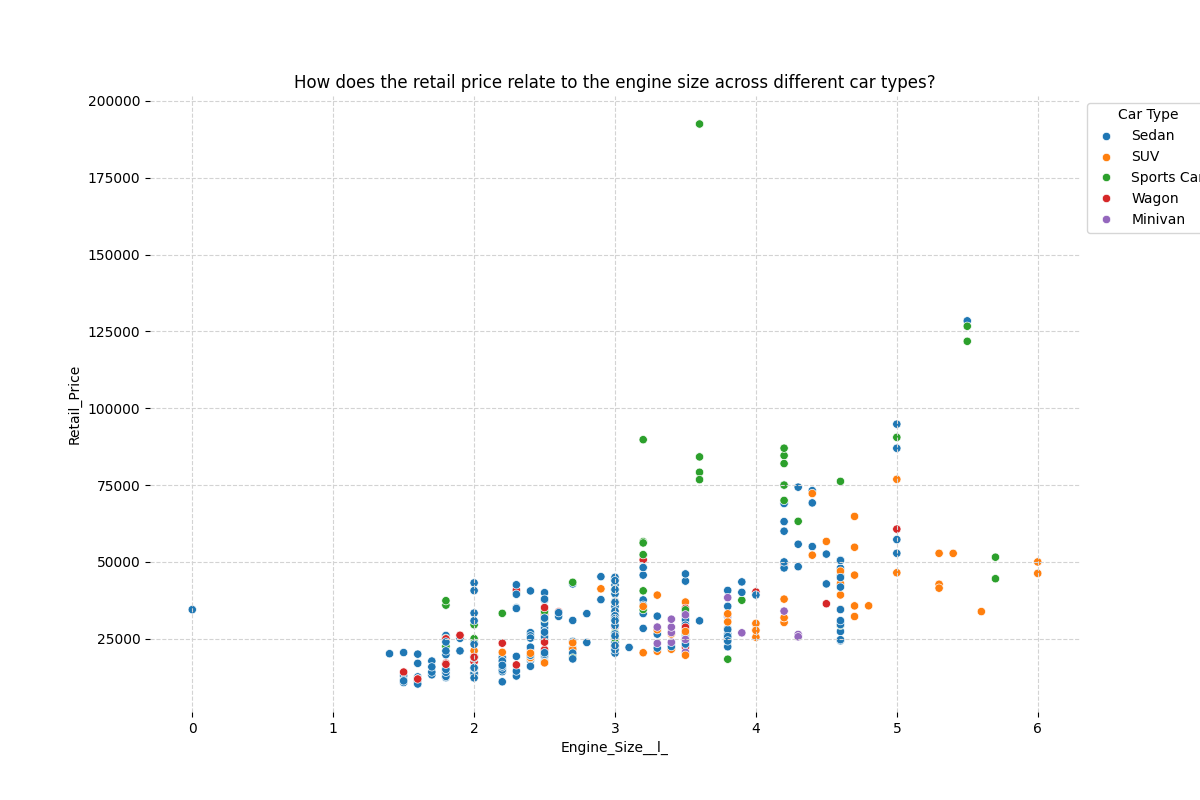

In [33]:
charts[0]

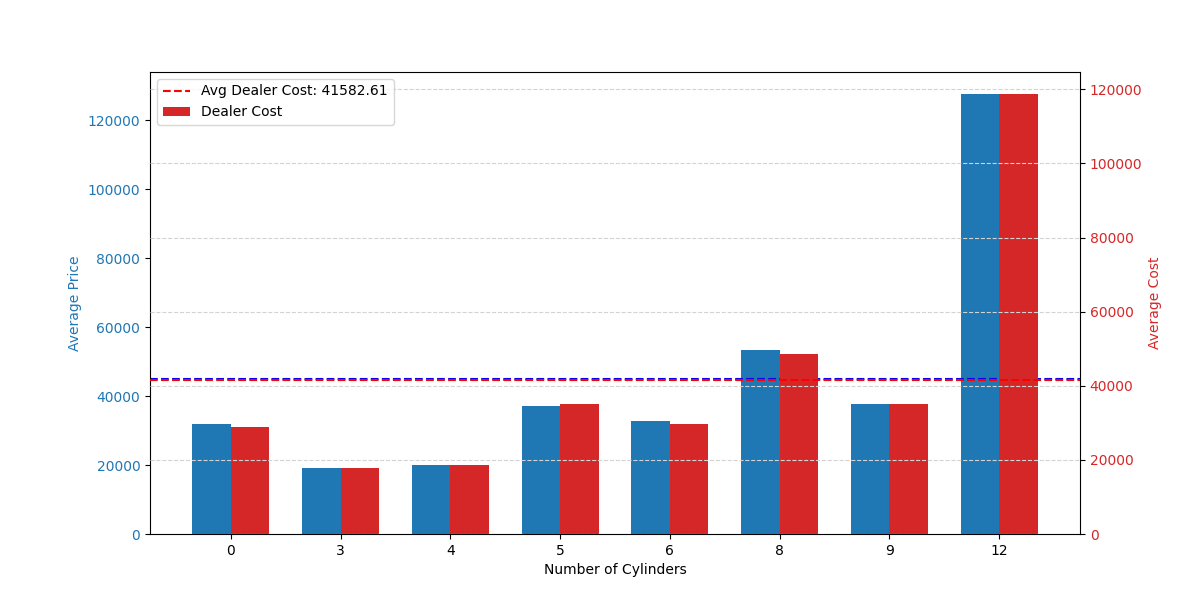

In [31]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["can you separate the bars for average cost and average price and put them side by side instead of stacking them?"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Save Code

In [38]:
# SAVE

with open('./scatter/cars5-v2-5-6/code-v2-5-6.pkl', 'wb') as f:
    pickle.dump(charts[0], f)

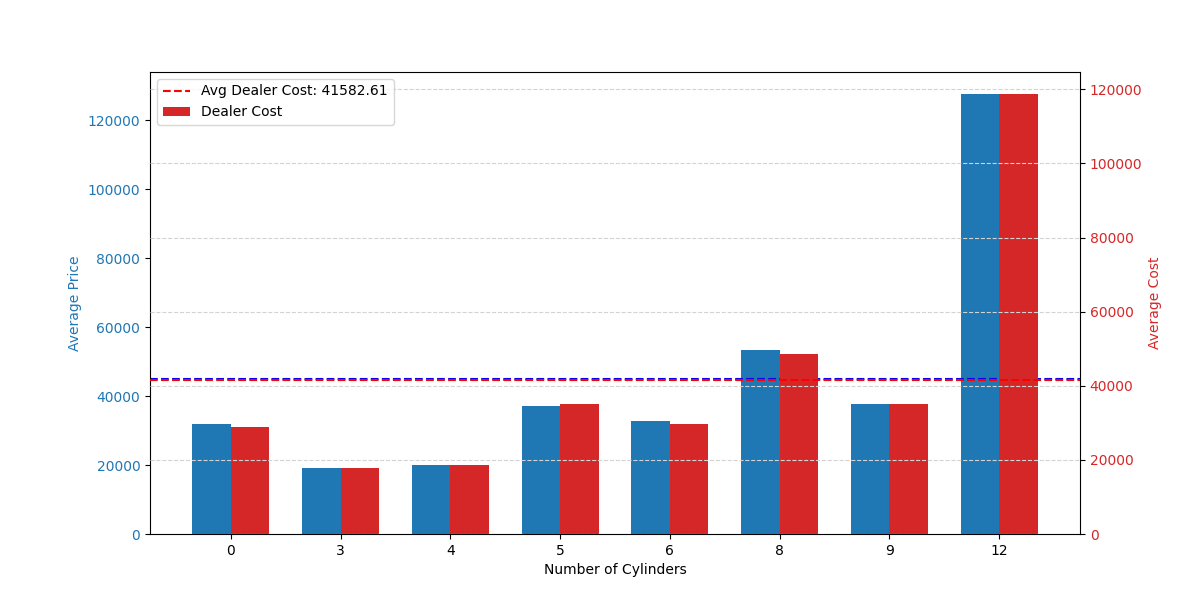

In [12]:
# LOAD

with open('./barchart/cars18-v2-5-6/code-edited.pkl', 'rb') as f:
    code = pickle.load(f)

display(code)

# Prompter (Generating Questions)

In [47]:
prompts = lida.prompt(goals[i], textgen_config=textgen_config, n=10)  

for prompt in prompts:
    display(prompt)


### Prompt 0
---
**Question:** What is the average retail price for cars with larger engine sizes compared to smaller engine sizes?

**Rationale:** This will help us understand if there is a trend of higher retail prices for cars with larger engine sizes, indicating a potential correlation between engine size and pricing.




### Prompt 1
---
**Question:** Are there any outliers in terms of retail price for a specific car type with a certain engine size?

**Rationale:** Identifying outliers can provide insights into unique cases where the retail price deviates significantly from the general trend, potentially indicating special features or circumstances affecting pricing.




### Prompt 2
---
**Question:** Which car type shows the strongest positive correlation between engine size and retail price?

**Rationale:** Identifying the car type with the strongest positive correlation can help us understand which type of cars tend to have higher retail prices as engine size increases, providing insights into market preferences or trends.




### Prompt 3
---
**Question:** Is there a noticeable difference in the spread of retail prices for cars with similar engine sizes but different types?

**Rationale:** Understanding the spread of retail prices within similar engine sizes across different car types can reveal if certain types of cars are consistently priced higher or lower than others, indicating market segmentation or pricing strategies.




### Prompt 4
---
**Question:** Do luxury car types tend to have larger engine sizes compared to economy car types?

**Rationale:** Comparing the engine sizes of luxury car types to economy car types can provide insights into whether engine size is a distinguishing factor between different market segments, helping understand the relationship between car type, engine size, and pricing.




### Prompt 5
---
**Question:** How do electric cars compare to traditional fuel cars in terms of engine size and retail price?

**Rationale:** Comparing electric cars to traditional fuel cars in terms of engine size and retail price can reveal differences in pricing strategies or market positioning between these two types of vehicles, offering insights into the impact of technology on pricing.




### Prompt 6
---
**Question:** Are there any car types that consistently deviate from the general trend of higher retail prices for larger engine sizes?

**Rationale:** Identifying car types that deviate from the general trend can highlight unique characteristics or market dynamics specific to those types, offering insights into factors beyond engine size that influence pricing.




### Prompt 7
---
**Question:** How do sports cars compare to SUVs in terms of engine size and retail price?

**Rationale:** Comparing sports cars to SUVs can provide insights into how different vehicle categories are priced based on engine size, helping understand consumer preferences and market positioning within the automotive industry.




### Prompt 8
---
**Question:** Is there a pattern in the distribution of car types based on engine size and retail price clusters?

**Rationale:** Identifying patterns in the distribution of car types based on engine size and retail price clusters can reveal market segments or pricing tiers within the dataset, offering insights into how cars are priced based on their characteristics.




### Prompt 9
---
**Question:** Do certain car types exhibit a more linear relationship between engine size and retail price compared to others?

**Rationale:** Identifying car types with a more linear relationship can indicate a stronger correlation between engine size and pricing within those types, providing insights into pricing strategies or consumer preferences specific to each type.



## Saving prompts

In [48]:
# SAVE

with open('./barchart/cars18-v2-5-6/prompt3/prompt-v3-4-10.pkl', 'wb') as f:
    pickle.dump(prompts, f)

In [13]:
# LOAD

with open('./barchart/cars18-v2-5-6/prompt3/prompt-v3-4-10.pkl', 'rb') as f:
    prompts = pickle.load(f)

display(prompts)

[Prompt(question='How does the average retail price change as the number of cylinders increases?', rationale='This helps us understand if higher cylinder counts correlate with higher retail prices, indicating consumer demand or perceived value.', index=0),
 Prompt(question='Are there any significant differences in dealer costs for vehicles with different cylinder counts?', rationale='Identifying these differences can reveal how dealer pricing strategies vary based on vehicle specifications.', index=1),
 Prompt(question='What trends can we observe in the relationship between retail price and dealer cost across cylinder counts?', rationale='Understanding this relationship can provide insights into pricing strategies and profit margins for different vehicle types.', index=2),
 Prompt(question='Do vehicles with a higher number of cylinders generally have a higher markup from dealer cost to retail price?', rationale='This can indicate how much value is added by the dealer for higher-cylinde

# Generating Insights

In [58]:
answers = [
    "The average retail price for cars with larger engine sizes compared to smaller ones are usually higher in general, but the difference in the price depends on the type. For instance in certain car types like sedans and sports cars, it's easier to see a steeper rise compared to car types like minivans, wagons and SUVs.",
    "The most expensive car (almost 200,000) is a sports car and it actually has an engine size of 3. There's also a sedan with an engine size of 0 that's around 30-40k and I don't really know how that's possible. Maybe not an outlier but sedans also offer a lot of price options for the same engine size.",
    "There doesn't seem to be one with a really really strong positive correlation because the dots form a trend line, but with a pretty big width, so I'm not really sure what that entails.",
    "Sedans usually have the most price options for different engine sizes. Sports cars are usually on the higher end of the price spectrum compared to other car types with the same engine size. Meanwhile, wagons and minivans tend to be on the lower end.",
    "I don't really know what luxury car types are, but I dont think that there are equal plot points to be able to acurately tell if more of the sports cars have higher engine sizes then economy car types.",
    "I don't know which ones are electric or traditional.",
    "For SUVs, even if the engine size is big, the price different isn't as large as other SUVs with smaller engine sizes. It's still generally more expensive, but the change is less compared to car types like sports cars. Maybe it's also worth noting that minivans and wagons' engine sizes don't exceed 5.",
    "Same answer as above. Sports cars are obviously more expensive on avarage.",
    "Maybe it generaally goes up? but I dont think that it's the sole predictor.",
    "Difficult to tell because none of them are perfectly linear but they all generally seems to have an upward trend in price as engine size increases."
]

with open('answers.pkl', 'wb') as f:
    pickle.dump(answers, f)

In [14]:
with open('./barchart/cars18-v2-5-6/prompt3/answers.pkl', 'rb') as f:
    answers = pickle.load(f)

display(answers)

['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders. All the other prices fall under or relatively close to 40,000 until the price of cars with 12 cylinders suddenly faces a drastic spike which is around 3x the others.',
 'The dealer costs are almost exactly the same as the average price.',
 'The dealer cost and average price are almost exactly the same.',
 'Yeah, generally. 12 has the highest price and cost, followed by 8, 9, then 5, then 6 and 0, then 4 and 3.',
 'At cylinder count of 12. The price and cost is 3x the average.',
 'The price and the cost are almost exactly the same. For cars with lover cylinder counts, they are below the average of 40,000.',
 'Between 4 and 6, the difference is around 5k. Between 6 and 8, the difference is around 10k.',
 'Cars with 12 cylinders have an extremely high cost and price of 120,000.',
 "I don't know the industry standards.",
 'I do not have information on thi

In [75]:
# LOAD

with open('./barchart/cars18-v2-5-6/prompt3/insight-v3-6-5.pkl', 'rb') as f:
    insight2 = pickle.load(f)

for insight_i in insight2:
    display(insight_i)


### Insight 0
---
**Insight:** The observation that cars with 0 cylinders have a higher average retail price than those with 3 and 4 cylinders suggests that there may be a niche market for electric or hybrid vehicles, which often have lower cylinder counts but can command higher prices due to their technology and fuel efficiency.



### Insight 1
---
**Insight:** The fact that dealer costs are almost identical to retail prices across cylinder counts indicates a lack of significant markup for most vehicles, which could imply a highly competitive market where dealers are unable to charge much more than their costs, especially for lower cylinder counts.



### Insight 2
---
**Insight:** The drastic spike in retail price and dealer cost for vehicles with 12 cylinders could indicate a luxury or performance segment that is less price-sensitive, suggesting that manufacturers might focus on high-end features and branding to justify the premium pricing.



### Insight 3
---
**Insight:** The consistent price and cost relationship for vehicles with fewer cylinders may reflect a trend towards more economical vehicles, which could influence future production strategies as manufacturers respond to consumer demand for affordability.



### Insight 4
---
**Insight:** The average price differences between 4, 6, and 8 cylinder vehicles suggest a tiered pricing strategy that could be leveraged in marketing campaigns, emphasizing the value proposition of each cylinder category to attract different consumer segments.


In [22]:
print(goals[18])

Goal(question='What is the impact of the number of cylinders on retail price and dealer cost?', visualization='dual-axis bar chart comparing average Retail_Price and average Dealer_Cost by Cyl', rationale='This dual-axis bar chart will allow us to compare the average retail price and dealer cost across different cylinder counts. By using this format, we can visualize how the number of cylinders influences both retail pricing and dealer costs, which is essential for understanding market dynamics.', index=18)


In [23]:
insights = lida.insights(goal=goals[i], answers=answers, prompts=prompts, n=10)


        Here are the questions and the answers to those questions:
        
            

 Question 1: How does the average retail price change as the number of cylinders increases?
            
 Answer: Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders. All the other prices fall under or relatively close to 40,000 until the price of cars with 12 cylinders suddenly faces a drastic spike which is around 3x the others.
            
            

 Question 2: Are there any significant differences in dealer costs for vehicles with different cylinder counts?
            
 Answer: The dealer costs are almost exactly the same as the average price.
            
            

 Question 3: What trends can we observe in the relationship between retail price and dealer cost across cylinder counts?
            
 Answer: The dealer cost and average price are almost exactly the same.
            
            

 Quest

In [18]:
for insight in insights:
    display(insight)

NameError: name 'insights' is not defined

In [76]:
#SAVE

with open('insight-v3-7-5.pkl', 'wb') as f:
    pickle.dump(insights, f)

### Generate visualization via a "user query"   

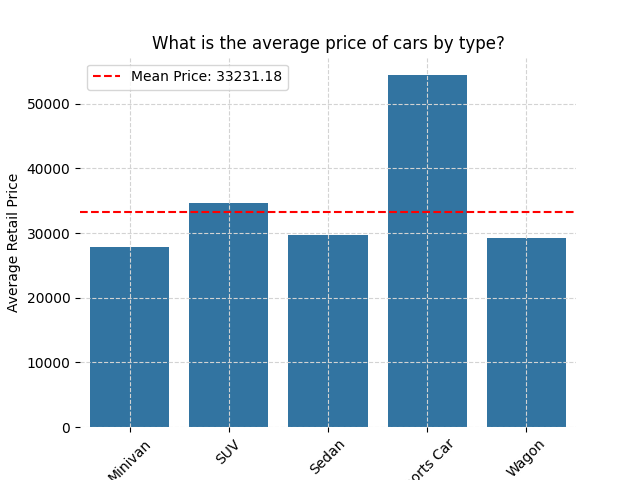

In [7]:
user_query = "What is the average price of cars by type?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

# VizOps

Given that LIDA represents visualizations as code,
the VISGENERATOR also implements submodules
to perform operations on this representation. 

This includes 
- **Natural language based visualization refinement**: Provides a conversational api to iteratively
4Execution in a sandbox environment is recommended.
refine generated code (e.g., translate chart t hindi
. . . zoom in by 50% etc) which can then be executed to generate new visualizations.
- **Visualization explanations and accessibility**:
Generates natural language explanations (valuable
for debugging and sensemaking) as well as accessibility descriptions (valuable for supporting users
with visual impairments).

- **Visualization code self-evaluation and repair**:
Applies an LLM to self-evaluate generated code on
multiple dimensions (see section 4.1.2).

- **Visualization recommendation**: Given some context (goals, or an existing visualization), recommend additional visualizations to the user (e.g., for
comparison, or to provide additional perspectives).



## Natural language based visualization refinement 

Given some code, modify it based on natural language instructions. This yields a new code snippet that can be executed to generate a new visualization.

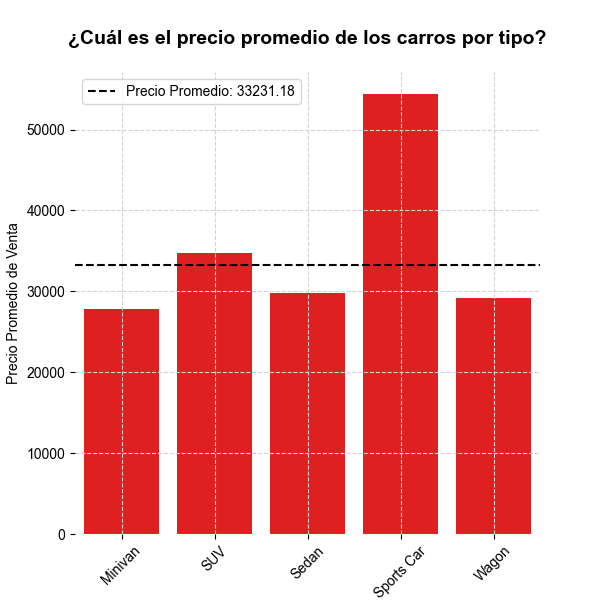

In [8]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to spanish"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Visualization explanations and accessibility

In [9]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config) 
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a bar plot created using the seaborn library. The goal of the chart is to show the average retail price of cars by type. The x-axis represents the different types of cars, while the y-axis represents the average retail price. The chart uses a blue color scheme for the bars and a red dashed line to represent the mean retail price. The chart is easy to read and understand, with clear labels and a title that summarizes the main insight.
transformation  **  This section of the code groups the data by car type and calculates the mean retail price for each group. The resulting data is stored in a new dataframe called grouped_data. The groupby() method is used to group the data by the 'Type' column, and the mean() method is used to calculate the average retail price for each group. The reset_index() method is used to reset the index of the resulting dataframe.
visualization  **  This section of the code creates the visualization of the data. The seaborn barplot

## Visualization code self-evaluation and repair

In [10]:
evaluations = lida.evaluate(code=code,  goal=goals[i], textgen_config=textgen_config, library=library)[0] 
for eval in evaluations:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t**********************************")

bugs Score 10 / 10
	 The code is free of bugs, syntax errors, and typos. It should compile without issues.
	**********************************
transformation Score 8 / 10
	 The data is grouped by Type and the mean of Retail_Price is calculated. However, this transformation is not appropriate for the specified goal of exploring the relationship between engine size and hor
	**********************************
compliance Score 6 / 10
	 The code does not fully meet the specified goal of exploring the relationship between engine size and horsepower. The plot shows the average retail price of cars by type instead.
	**********************************
type Score 3 / 10
	 The barplot is not an appropriate visualization type for exploring the relationship between engine size and horsepower. A scatterplot or line plot would be more appropriate.
	**********************************
encoding Score 8 / 10
	 The data is encoded appropriately with Type on the x-axis and Retail_Price on the y-axis. Howev

## Visualization Recommendation

In [11]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

Recommended 1 charts


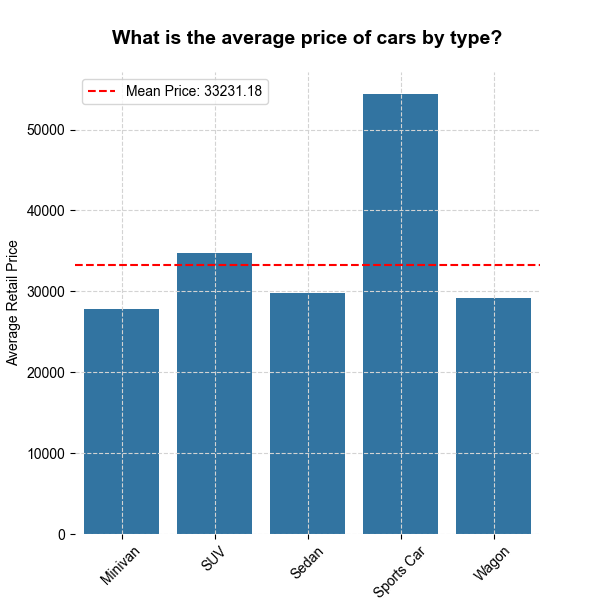

In [12]:
print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart) 